In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.5 MB/s eta 0:00:00


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Internal Project Sp25')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('berkeley_decade_weather_data.csv')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df.set_index('date', inplace=True)

In [ ]:
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

df.drop(columns=["month"], inplace=True)

In [ ]:
df = df[['temperature_max', 'month_sin', 'month_cos']]

In [ ]:
train_size = int(len(df) * (8 / 10))
train, val = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
train = train.asfreq('D')
val = val.asfreq('D')

In [ ]:
exog_train = train[['month_sin', 'month_cos']]
exog_val = val[['month_sin', 'month_cos']]

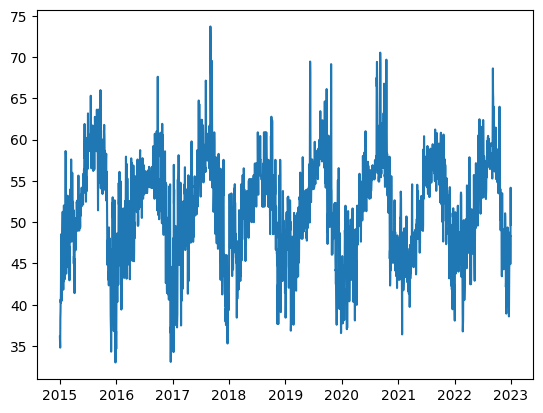

In [ ]:
plt.plot(train['temperature_max'])

In [ ]:
params = auto_arima(train["temperature_max"],
                    exogenous=exog_train,
                    seasonal=False,
                    trace=True,
                    stepwise=True)

p, d, q = params.order

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=14112.387, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31366.412, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=27527.988, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=14220.952, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=14464.767, Time=1.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=4.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=14114.048, Time=1.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14442.881, Time=1.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=14151.648, Time=1.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=14115.914, Time=3.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=14114.487, Time=1.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14097.815, Time=5.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14173.925, Time=4.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14290.789, Time=5.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=14124.360, Time=6.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=14100.688, Time=10.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14299.165, Time=1.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=14126.348, Time=3.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14115.455, Time=9.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=14100.373, Time=6.93 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 70.762 seconds


In [ ]:
model = SARIMAX(train["temperature_max"],
                        order=(p, d, q),
                        exog=exog_train,
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
for i in range(5):
  first_pred = model.predict(start=train.index[i], end=train.index[i], exog=exog_train.iloc[[i]], dynamic=False)
  print(f"Prediction {i}: {first_pred.values[0]}")
  print(f"Actual Value: {train['temperature_max'].iloc[i]}")

Prediction 0: -6.495081276445095
Actual Value: 36.14
Prediction 1: 63.234712237096204
Actual Value: 35.58
Prediction 2: 35.223763582923
Actual Value: 34.81
Prediction 3: 34.320175222299014
Actual Value: 38.39
Prediction 4: 38.958833181261795
Actual Value: 39.07


In [ ]:
train_compare = train.copy()
train_compare.loc[:, 'temperature_max_predicted'] = model.predict(start=train.index[3], end=train.index[-1], exog=exog_train, dynamic=False)

train_compare = train_compare.iloc[3:]

train_mae = mean_absolute_error(train_compare['temperature_max'], train_compare['temperature_max_predicted'])
train_mse = mean_squared_error(train_compare['temperature_max'], train_compare['temperature_max_predicted'])

print(f"Train MAE: {train_mae:.2f}, Train MSE: {train_mse:.2f}")

Train MAE: 2.04, Train MSE: 7.37


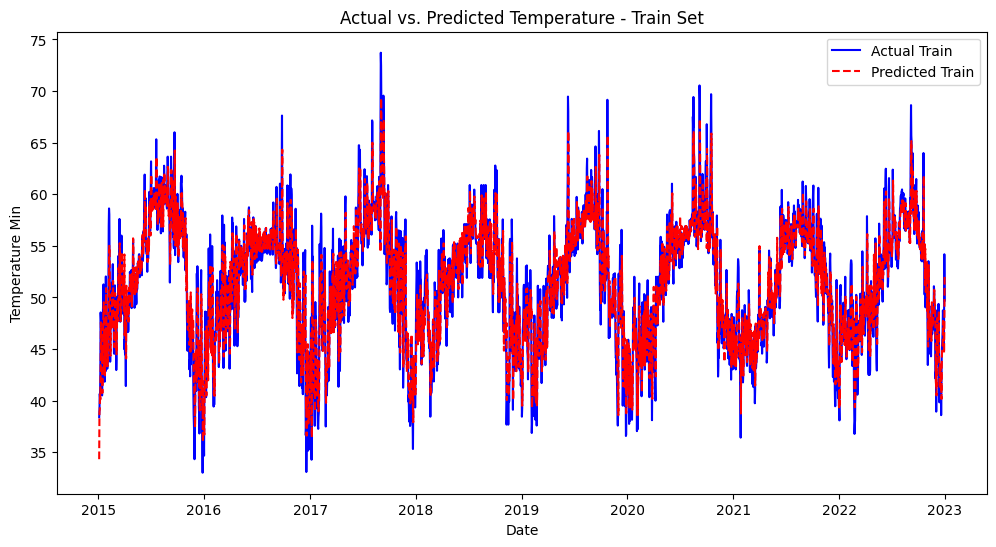

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train_compare.index, train_compare["temperature_max"], label="Actual Train", color="blue")
plt.plot(train_compare.index, train_compare["temperature_max_predicted"], label="Predicted Train", linestyle="dashed", color="red")

plt.title("Actual vs. Predicted Temperature - Train Set")
plt.xlabel("Date")
plt.ylabel("Temperature Max")
plt.legend()
plt.show()

In [ ]:
import warnings
warnings.simplefilter("ignore")

predictions = []
observed = list(train['temperature_max'])

exog_val = exog_val.copy()
exog_val.index = val.index

for i in range(len(val)):
    forecast = model.forecast(steps=1, exog=exog_val.iloc[i:i+1])[0]
    predictions.append(forecast)
    model = model.append([val["temperature_max"].iloc[i]], exog=exog_val.iloc[i:i+1], refit=False, dynamic=False)

val['temperature_max_predicted'] = predictions

val_mae = mean_absolute_error(val['temperature_max'], val['temperature_max_predicted'])
val_mse = mean_squared_error(val['temperature_max'], val['temperature_max_predicted'])

print(f"Validation MAE: {val_mae:.2f}, Validation MSE: {val_mse:.2f}")

Validation MAE: 1.80, Validation MSE: 5.96


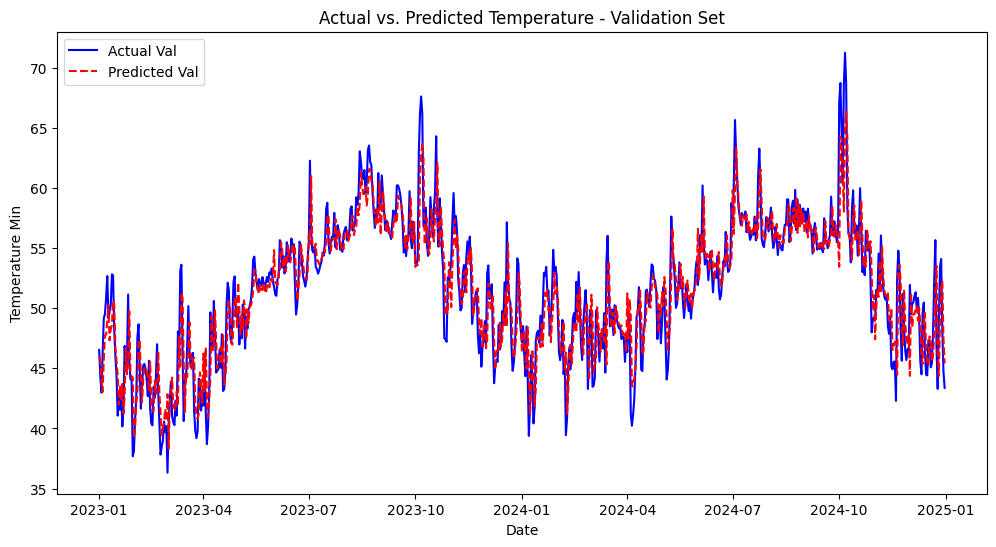

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(val.index, val["temperature_max"], label="Actual Val", color="blue")
plt.plot(val.index, val["temperature_max_predicted"], label="Predicted Val", linestyle="dashed", color="red")

plt.title("Actual vs. Predicted Temperature - Validation Set")
plt.xlabel("Date")
plt.ylabel("Temperature Max")
plt.legend()
plt.show()

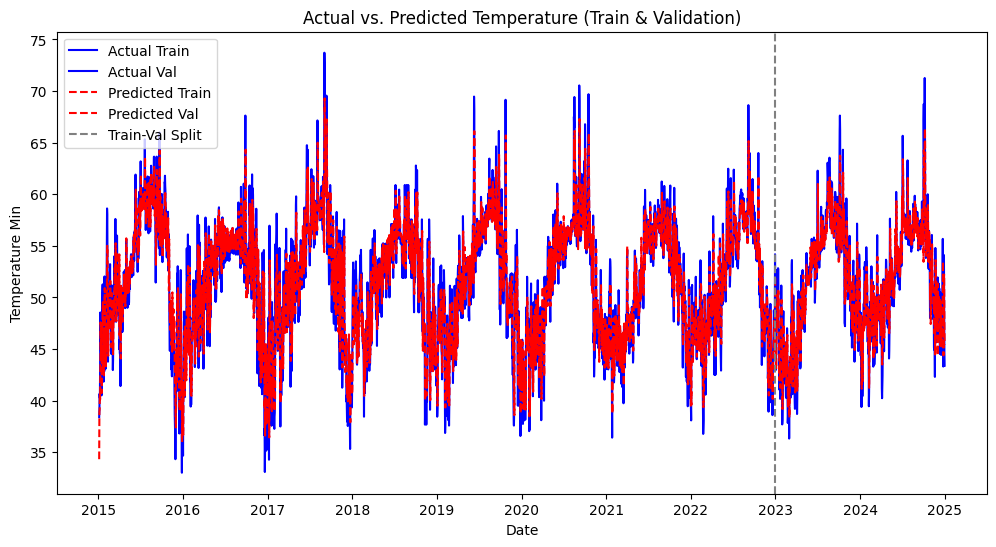

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train_compare.index, train_compare["temperature_max"], label="Actual Train", color="blue")
plt.plot(val.index, val["temperature_max"], label="Actual Val", color="blue")

plt.plot(train_compare.index, train_compare["temperature_max_predicted"], label="Predicted Train", linestyle="dashed", color="red")
plt.plot(val.index, val["temperature_max_predicted"], label="Predicted Val", linestyle="dashed", color="red")

plt.axvline(x=val.index[0], color="gray", linestyle="--", label="Train-Val Split")

plt.title("Actual vs. Predicted Temperature (Train & Validation)")
plt.xlabel("Date")
plt.ylabel("Temperature Max")
plt.legend()
plt.show()

In [ ]:
import joblib

joblib.dump(model, "arimax_min_temperature_model.pkl")

from google.colab import files
files.download("arimax_min_temperature_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>